In [393]:
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools

In [388]:
#年份以後為主
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def pca_def(n,data):
    sc = StandardScaler()
    data_std = sc.fit_transform(data)
    data_std_cov = np.cov(data_std.T)
    eigen_value,eigen_vector = np.linalg.eig(data_std_cov)
    #print(eigen_vector)
    eigen_pair = list(zip(eigen_value,eigen_vector))
    #照eigen_value大小排列
    eigen_column = list(zip(data.columns,eigen_value))
    eigen_pair.sort(key = lambda x:np.abs(x[0]),reverse=True)
    #print(eigen_pair)
    eigen_column.sort(key = lambda x:np.abs(x[1]),reverse=True)
    eigen_vector_final = []
    for x in eigen_pair:
        eigen_vector_final.append(x[1][:n])
    eigen_column_final = []
    for x in eigen_column:
        eigen_column_final.append(x[0])
    ans = dict()
    ans['new_base_pca'] = np.array(eigen_vector_final)
    ans['new_base_pca_column'] = eigen_column_final
    #累積圖
    eigen_value_accumulate = []
    eigen_value_accumulate_percent = []
    num = 0
    for x in eigen_pair:
        num += x[0]
        eigen_value_accumulate.append(num)
    for x in eigen_value_accumulate:
        num = x/eigen_value_accumulate[-1]
        eigen_value_accumulate_percent.append(num)
    ans['New Coordinate'] = np.array(data_std.dot(np.array(eigen_vector_final)))
    ans['eigen_value_accumulate_percent'] = eigen_value_accumulate_percent
    return(ans)
#New Coordinate 回傳新座標
#eigen_value_accumulate_percent 回傳累積比率畫軸圖
#new_base_pca 回傳鐔座標的各特徵

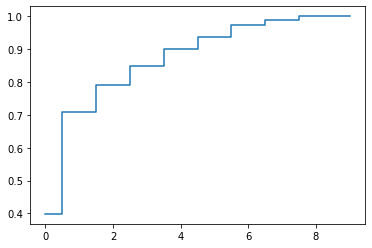

In [160]:
#自行整理資料
df = pd.read_csv('/Users/xuzhejia/Desktop/NBA/例行賽數據截至2012-13賽季.csv',index_col= 0)
df.set_index('name',inplace=True)
year = input('輸入年份')
df = df[df['year'] == int(year)]    #設定資料年份
df_pca = df.loc[:,['PTS','FG_precent','3PM_percent','FT_percent','REB','AST','STL','BLK','TOV','EFF']]  #選擇關心之欄位
m = pca_def(n = 2,data = df_pca)
df_pca = pd.DataFrame(m['new_base_pca']).T
df_pca.columns = m['new_base_pca_column']

plt.step(range(len(m['eigen_value_accumulate_percent'])),m['eigen_value_accumulate_percent'],where = 'mid')
plt.show()

#s為pca1 及 pca2的matrix
s = m['New Coordinate']

In [161]:
df['pca1'] = s[:,0]
df['pca2'] = s[:,1]
year_team_2021 = ['Nikola Jokic','Stephen Curry','Giannis Antetokounmpo','Kawhi Leonard','Luka Doncic',
                  'Chris Paul','Damian Lillard','LeBron James','Julius Randle','Joel Embiid','Kyrie Irving',
                 'Bradley Beal','Jimmy Butler','Paul George','Rudy Gobert']
year_team_2020 = ['LeBrom James','Giannis Antetokounmpo','Anthony Davis','James Harden','Luka Doncic',
                'Kawhi Leonard','Pascal Siakam','Nikola Jokic','Damian Lillard','Chris Paul','Jimmy Butler',
                'Jayson Tatum','Rudy Gobert','Ben Simmons','Russell Westbrook']
year_team_2019 = ['James Harden','Stephen Curry','Giannis Antetokounmpo','Chris Paul','Nikola Jokic','Damian Lillard',
                'Kyrie Irving','Kevin Durant','Kawhi Leonard','Joel Embiid','Russell Westbrook','Kemba Walker',
                'Blake Griffin','LeBrom James','Rudy Gobert']
year_team_2018 = ['James Harden','Damian Lillard','LeBrom James','Kevin Durant','Anthony Davis','DeMar DeRozan',
                'Russell Westbrook','Giannis Antetokounmpo','LaMarcus Aldridge','Joel Embiid','Stephen Curry',
                'Victor Oladipo','Jimmy Butler','Chris Paul','Karl-Anthony Towns']
year_team_2017 = ['James Harden','Russell Westbrook','LeBrom James','Kwawhi Leonard','Anthony Davis','Stephen Curry',
                'Isaiah Thomas','Kevin Durant','Giannis Antetokounmpo','Rudy Gobert','Jimmy Butler','DeMar DeRozan',
                'John Wall','Draymond Green','DeAndre Jordan']
year_team_2016 = ['Stephen Curry','Kawhi Leonard','DeAndre Jordan','Russell Westbrook','LeBrom James','Chris Paul',
                'Kevin Durant','DeMarcus Cousins','Damian Lillard','Draymond Green','Kyle Lowry','Paul George',
                'Andre Drummond','Klay Thompson','LaMarcus Aldridge']
year_team_dummy = []
year_dict = {2021 : year_team_2021,2020 : year_team_2020,2019 : year_team_2019,2016 : year_team_2016,2018 : year_team_2018,2017 : year_team_2017}
for x in df.index:
    if x in year_dict[int(year)]:   #年份要換
        year_team_dummy.append(1)
    else:
        year_team_dummy.append(0)
df['year_team_dummy'] = year_team_dummy

KeyError: 2013

In [162]:
df

,Game_Participate,MIN,PTS,FGM,FGA,FG_precent,3PM,3PA,3PM_percent,FTM,...,DREB,REB,AST,STL,BLK,TOV,EFF,year,pca1,pca2
name,,,,,,,,,,,,,,,,,,,,,
Carmelo Anthony,67,37.0,28.7,10.0,22.2,44.9,2.3,6.2,37.9,6.3,...,4.9,6.9,2.6,0.8,0.5,2.6,23.2,2013,2.212143,-0.211193
Kevin Durant,81,38.5,28.1,9.0,17.7,51.0,1.7,4.1,41.6,8.4,...,7.3,7.9,4.6,1.4,1.3,3.5,30.4,2013,4.662130,-0.008473
Kobe Bryant,78,38.6,27.3,9.5,20.4,46.3,1.7,5.2,32.4,6.7,...,4.7,5.6,6.0,1.4,0.3,3.7,24.6,2013,3.696922,0.670285
LeBron James,76,37.9,26.8,10.1,17.8,56.5,1.4,3.3,40.6,5.3,...,6.8,8.0,7.3,1.7,0.9,3.0,32.2,2013,4.659306,0.615103
James Harden,78,38.3,25.9,7.5,17.1,43.8,2.3,6.2,36.8,8.6,...,4.1,4.9,5.8,1.8,0.5,3.8,24.0,2013,4.106957,0.198715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pablo Prigioni,78,16.2,3.5,1.3,2.8,45.5,0.7,1.7,39.6,0.3,...,1.3,1.8,3.0,0.9,0.0,1.1,6.6,2013,-0.786963,-0.433578
Dahntay Jones,78,13.0,3.4,1.1,2.8,36.9,0.1,0.6,22.4,1.1,...,1.0,1.3,0.6,0.3,0.1,0.5,3.0,2013,-2.832674,-0.965357
Draymond Green,79,13.4,2.9,1.1,3.3,32.7,0.2,0.8,20.9,0.6,...,2.6,3.3,0.7,0.5,0.3,0.6,4.7,2013,-2.298609,-1.151032


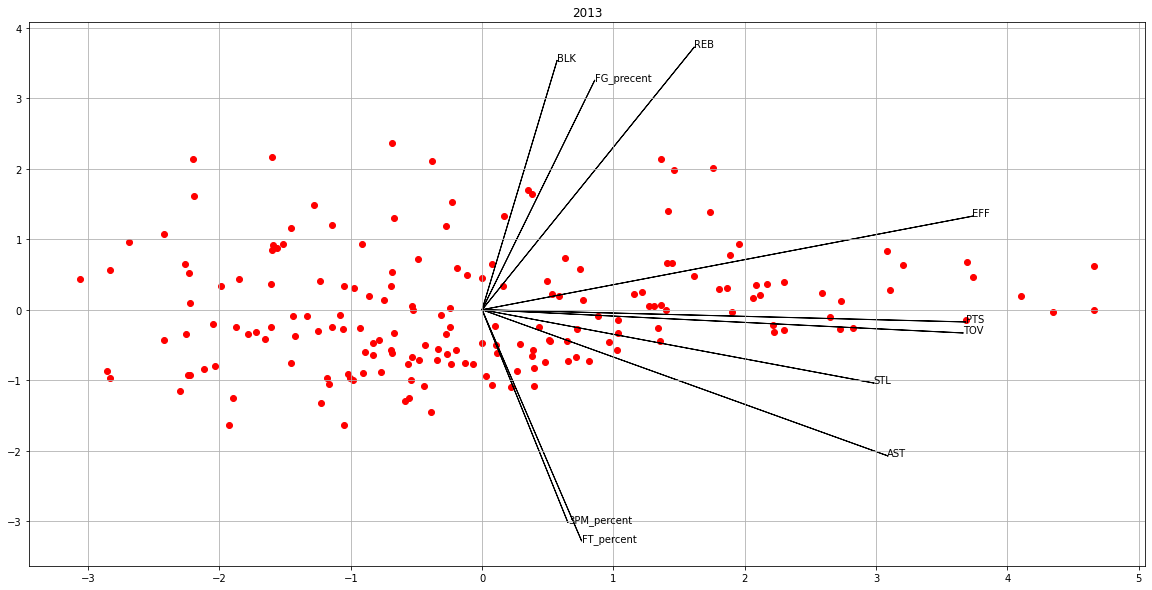

In [163]:
plt.figure(figsize=(20,10))
plt.title(year)
for x in range(len(df.index)):
    try:
        if df['year_team_dummy'][x] == 0:
            plt.scatter(df['pca1'][x],df['pca2'][x],color = 'pink')
        else:
            plt.scatter(df['pca1'][x],df['pca2'][x],color = 'skyblue')
            plt.text(df['pca1'][x],df['pca2'][x],s = df.index[x])
    except:
        plt.scatter(df['pca1'][x],df['pca2'][x],color = 'red')
for x in range(len(df_pca.columns)):
    plt.arrow(0,0,df_pca.iloc[0,x]*8,df_pca.iloc[1,x]*8)
    plt.text(df_pca.iloc[0,x]*8,df_pca.iloc[1,x]*8,s = df_pca.columns[x])
plt.grid()


#16年可發現戰機重要性

In [159]:
df[df['year_team_dummy'] == 1]['FT_percent']

name
Stephen Curry        90.8
Kevin Durant         89.8
DeMarcus Cousins     71.8
Damian Lillard       89.2
Russell Westbrook    81.2
Paul George          86.0
Klay Thompson        87.3
Kyle Lowry           81.1
Kawhi Leonard        87.4
Chris Paul           89.6
LaMarcus Aldridge    85.8
Andre Drummond       35.5
Draymond Green       69.6
DeAndre Jordan       43.0
Name: FT_percent, dtype: float64

In [302]:
#恩加給的資料
年份 = input('year')
file_name = '/Users/xuzhejia/Desktop/NBA/資料/' + 年份 + '完整資料.csv'
df = pd.read_csv(file_name)
df.index = df['Player']
df = df.iloc[:,1:]
df_pca = df.loc[:,['W','PTS','FG%','3P%','FT%','REB','AST','STL','BLK','+/-','累積前三隊','DIFF_percent']]
m = pca_def(n = 2, data = df_pca)
df['pca1'] = m['New Coordinate'][:,0]
df['pca2'] = m['New Coordinate'][:,1]
q = pd.DataFrame(m['new_base_pca']).T
#q.columns = m['new_base_pca_column']
q.columns = m['new_base_pca_column']


[(4.05071208650164, array([ 0.34015541, -0.06810686,  0.34199934,  0.07986391,  0.0358114 ,
        0.04726945, -0.11951224,  0.71604038,  0.29137619,  0.28135165,
       -0.24686902, -0.02823037])), (1.6907783638148235, array([ 0.43392453, -0.12841022, -0.13725351,  0.00116005,  0.69870424,
        0.08464477,  0.51299283, -0.04716989, -0.04638647, -0.10856546,
       -0.00717263,  0.04064286])), (1.2460546930292553, array([ 0.23849455,  0.37500705,  0.22779343,  0.27608657,  0.04575923,
        0.021004  , -0.10909739,  0.05902251, -0.19630147,  0.11788018,
        0.74032144,  0.23653672])), (1.0898997846342584, array([ 0.11327227, -0.43998798,  0.41022145,  0.0134224 , -0.11943844,
       -0.04750435, -0.06726399, -0.10770517, -0.33628109, -0.2322067 ,
       -0.18909095,  0.62426822])), (0.17580391157879036, array([ 0.2117214 , -0.26636214,  0.24708056,  0.4577712 , -0.09423993,
        0.01366122, -0.03087127, -0.26338456, -0.34914598,  0.14861192,
       -0.07627851, -0.62001847

[[ 0.34015541 -0.06810686]
 [ 0.43392453 -0.12841022]
 [ 0.23849455  0.37500705]
 [ 0.11327227 -0.43998798]
 [ 0.29186543  0.46436623]
 [ 0.23284904  0.04266873]
 [-0.06369368 -0.33764843]
 [ 0.19473325 -0.04377796]
 [ 0.36906405 -0.17668179]
 [ 0.34565915 -0.33505378]
 [ 0.37999611  0.31120201]
 [ 0.2117214  -0.26636214]]


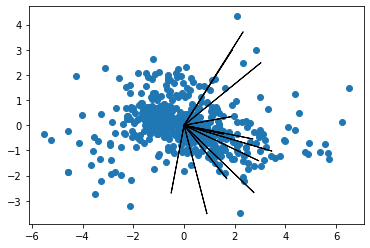

In [303]:
plt.scatter(df['pca1'],df['pca2'])
for x in range(len(m['new_base_pca'])):
    plt.arrow(0,0,m['new_base_pca'][x][0]*8,m['new_base_pca'][x][1]*8)
print(m['new_base_pca'])

In [304]:
qq = pd.DataFrame(m['new_base_pca'].T)
qq.columns = m['new_base_pca_column']
qq

,W,PTS,FG%,3P%,BLK,+/-,DIFF_percent,累積前三隊,STL,AST,REB,FT%
0,0.340155,0.433925,0.238495,0.113272,0.291865,0.232849,-0.063694,0.194733,0.369064,0.345659,0.379996,0.211721
1,-0.068107,-0.128410,0.375007,-0.439988,0.464366,0.042669,-0.337648,-0.043778,-0.176682,-0.335054,0.311202,-0.266362


In [309]:
df[df.index == 'Rudy Gobert']

,Player,Team,AGE,GP_x,W,L,MIN,PTS,FGA,FG%,...,Year,累積前三隊,當年有無入選,勝率,position,DFG_percent,DIFF_percent,year,pca1,pca2
Player,,,,,,,,,,,,,,,,,,,,,
Rudy Gobert,Rudy Gobert,UTA,27,81,50,31,31.8,15.9,8.8,66.9,...,2019,1,True,0.62,C,50.7,-7.4,2019,4.537722,0.495233


In [296]:
from sklearn.decomposition import PCA

# 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
# 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors

n_components = 2
random_state = 9527

pca = PCA(n_components=n_components, 
          random_state=random_state)
sc = StandardScaler()
df_pca = sc.fit_transform(df_pca)
# 注意我們是對正規化後的特徵 Z 做 PCA
L = pca.fit_transform(df_pca)  # (n_samples, n_components)

In [289]:
pca.components_ #每有按照eigen value 排咧

array([[ 0.34441877,  0.42955886,  0.18683293,  0.17040971,  0.2549362 ,
         0.36602647,  0.34228209,  0.36431254,  0.30173879,  0.2197068 ,
         0.21152541],
       [ 0.0411891 , -0.11913225,  0.33149232, -0.46214383, -0.32318363,
         0.38203836, -0.33970425, -0.20929203,  0.47720035,  0.13425004,
         0.07280485]])

[[ 0.34015541 -0.06810686]
 [ 0.43392453 -0.12841022]
 [ 0.23849455  0.37500705]
 [ 0.11327227 -0.43998798]
 [ 0.29186543  0.46436623]
 [ 0.23284904  0.04266873]
 [-0.06369368 -0.33764843]
 [ 0.19473325 -0.04377796]
 [ 0.36906405 -0.17668179]
 [ 0.34565915 -0.33505378]
 [ 0.37999611  0.31120201]
 [ 0.2117214  -0.26636214]]


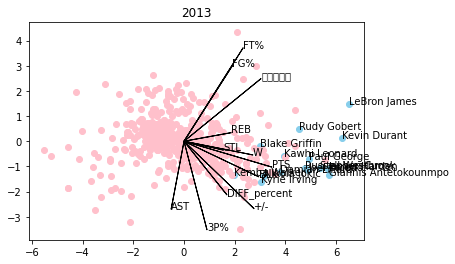

In [313]:
#plt.figure(figsize=(20,10))
plt.title(year)
for x in range(len(df.index)):
    try:
        if df['當年有無入選'][x] == False:
            plt.scatter(df['pca1'][x],df['pca2'][x],color = 'pink')
        else:
            plt.scatter(df['pca1'][x],df['pca2'][x],color = 'skyblue')
            plt.text(df['pca1'][x],df['pca2'][x],s = df.index[x])
    except:
        plt.scatter(df['pca1'][x],df['pca2'][x],color = 'red')
for x in range(len(m['new_base_pca'])):
    plt.arrow(0,0,m['new_base_pca'][x][0]*8,m['new_base_pca'][x][1]*8)
    plt.text(m['new_base_pca'][x][0]*8,m['new_base_pca'][x][1]*8,s = df_pca.columns[x])
print(m['new_base_pca'])

#晚整加入訪收資料並分位置

In [580]:
年份 = input('year')
location = input('位置')
file_name = '/Users/xuzhejia/Desktop/NBA/資料/' + 年份 + '完整資料.csv'
df = pd.read_csv(file_name)
df = df[df['position'] == location.upper()]
df.index = df['Player']
df = df.iloc[:,1:]
df_pca = df.loc[:,['W','PTS','FG%','3P%','FT%','REB','AST','STL','BLK','+/-','累積前三隊','DIFF_percent']]
m = pca_def(n = 2, data = df_pca)
df['pca1'] = m['New Coordinate'][:,0]
df['pca2'] = m['New Coordinate'][:,1]
q = pd.DataFrame(m['new_base_pca']).T
#q.columns = m['new_base_pca_column']
q.columns = m['new_base_pca_column']

[[ 2.60726301  3.50090265  1.50435863 ...  4.05191882  1.79213007
  -0.24128352]
 [ 0.78570567  3.31580671  0.46251782 ...  0.59084423  2.80323049
  -0.08689905]
 [ 0.72498709  2.6595575   0.14195141 ...  0.53012362  0.78102966
  -0.25231098]
 ...
 [-0.79297736 -1.41255301 -2.35846655 ...  0.04435877 -0.23007075
  -3.38411032]
 [-1.40016314 -1.46303372 -2.56683471 ... -1.13969307 -0.23007075
   2.83537851]
 [-1.70375603 -1.56399513 -6.57391477 ... -2.90059067 -0.23007075
  -0.70443694]]


[[-0.31401605 -0.3011639 ]
 [-0.39216537  0.11559379]
 [-0.27044472 -0.27555964]
 [-0.20296552 -0.40577076]
 [-0.28527183  0.17116535]
 [ 0.130863    0.29063835]
 [-0.21636428  0.15716904]
 [-0.27315278 -0.34038595]
 [-0.34842675  0.330231  ]
 [-0.33051524  0.33481682]
 [-0.38459947  0.24287272]
 [-0.18648197 -0.34767867]]


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 32047 missing from current font.

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 31309 missing from current font.

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 21069 missing from current font.

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 19977 missing from current font.

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 38538 missing from current font.

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 32047 missing from current font.

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/b

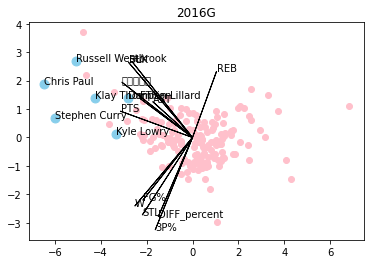

In [581]:
plt.title(年份+location)
for x in range(len(df.index)):
    try:
        if df['當年有無入選'][x] == False:
            plt.scatter(df['pca1'][x],df['pca2'][x],color = 'pink')
        else:
            plt.scatter(df['pca1'][x],df['pca2'][x],color = 'skyblue',s = 80)
            plt.text(df['pca1'][x],df['pca2'][x],s = df.index[x])
    except:
        plt.scatter(df['pca1'][x],df['pca2'][x],color = 'red')
for x in range(len(m['new_base_pca'])):
    plt.arrow(0,0,m['new_base_pca'][x][0]*8,m['new_base_pca'][x][1]*8)
    plt.text(m['new_base_pca'][x][0]*8,m['new_base_pca'][x][1]*8,s = df_pca.columns[x])
print(m['new_base_pca'])

In [582]:
fig = px.scatter(df,x = 'pca1',y = 'pca2',size = '勝率',color = '當年有無入選',hover_name='Player',title = 年份+location,hover_data=['MIN','PTS','AST','REB','3P%','DIFF_percent'])
#for x in range(len(m['new_base_pca'])):
#    px.line([0,m['new_base_pca'][x][0]*8],[0,m['new_base_pca'][x][1]*8])
for x in range(len(m['new_base_pca'])):
    fig.add_shape(
            type='line',
            x0=0, y0=0,
            x1=m['new_base_pca'][x][0]*8,
            y1=m['new_base_pca'][x][1]*8,
            line = dict(color = 'skyblue')
    )
    fig.add_annotation(
        x = m['new_base_pca'][x][0]*8,
        y = m['new_base_pca'][x][1]*8,
        ax=0, ay=0,
        xanchor="auto",
        yanchor="auto",
        text=m['new_base_pca_column'][x],
        font = dict(color = 'rgb(84,39,143)')
    )
fig.update_layout({
    'paper_bgcolor':'rgb(254,245,244)',
    'plot_bgcolor':'rgb(254,245,244)'
})
fig.show()